In [1]:
import os
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
os.chdir(r"C:\Users\mehul\Time_Series_Analysis")
from predictions import *

In [2]:
df_iota = predictions("iota_price.csv")
df_iota.data = df_iota.data.reindex(index=df_iota.data.index[::-1])

                Open      High       Low     Close       Volume  \
2017-06-13  0.638503  0.652862  0.533910  0.590255  2,54,25,600   
2017-06-14  0.592347  0.606196  0.495745  0.528916  1,41,94,900   
2017-06-15  0.528284  0.543165  0.300365  0.363661  1,03,00,400   
2017-06-16  0.353285  0.448249  0.309852  0.410757    69,20,690   
2017-06-17  0.426762  0.444205  0.414139  0.419906    31,00,660   

                Market Cap      Mean  
2017-06-13  1,77,47,40,000  0.603882  
2017-06-14  1,64,64,50,000  0.555801  
2017-06-15  1,46,83,80,000  0.433869  
2017-06-16    98,19,66,000  0.380536  
2017-06-17  1,18,62,00,000  0.426253  
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-06-13 to 2018-02-20
Freq: D
Data columns (total 7 columns):
Open          253 non-null float64
High          253 non-null float64
Low           253 non-null float64
Close         253 non-null float64
Volume        253 non-null o

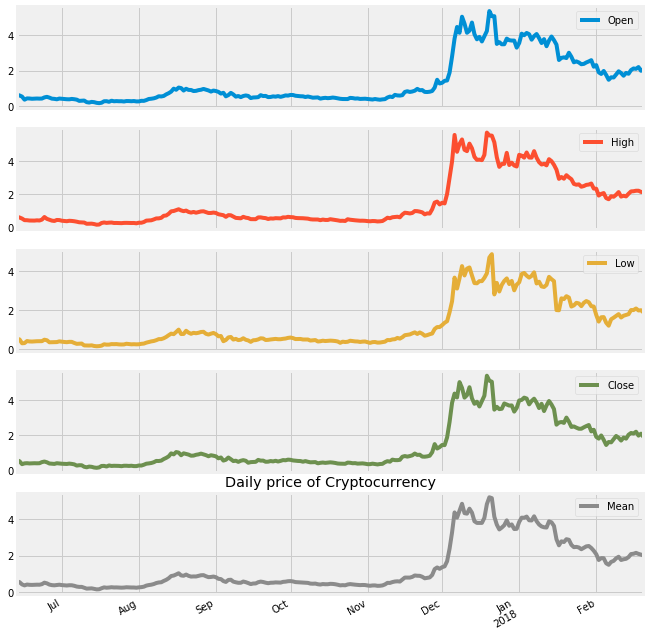

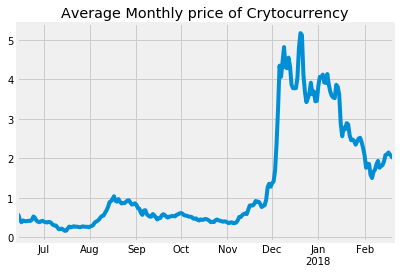

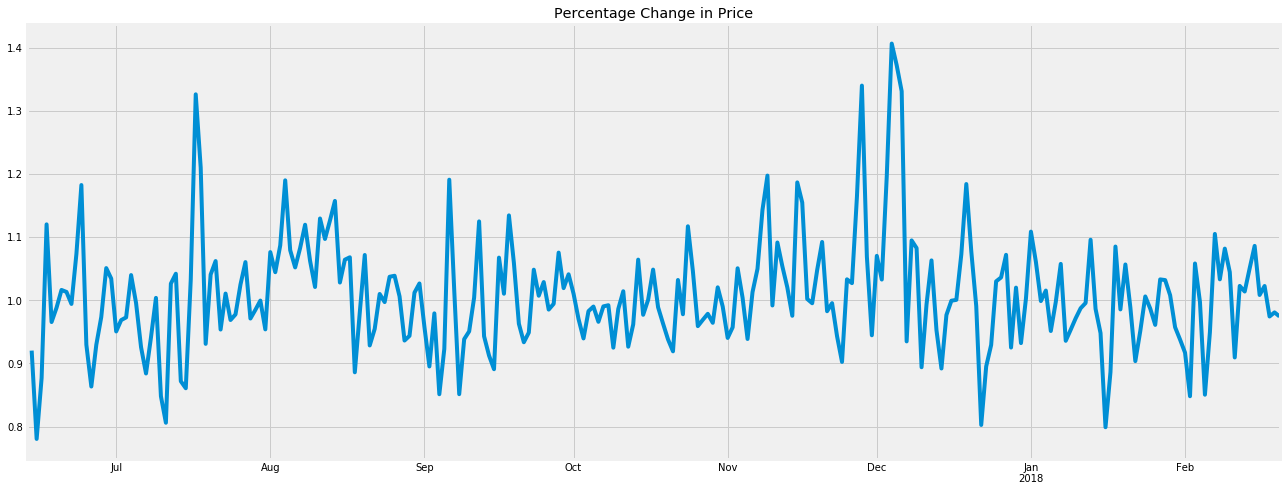

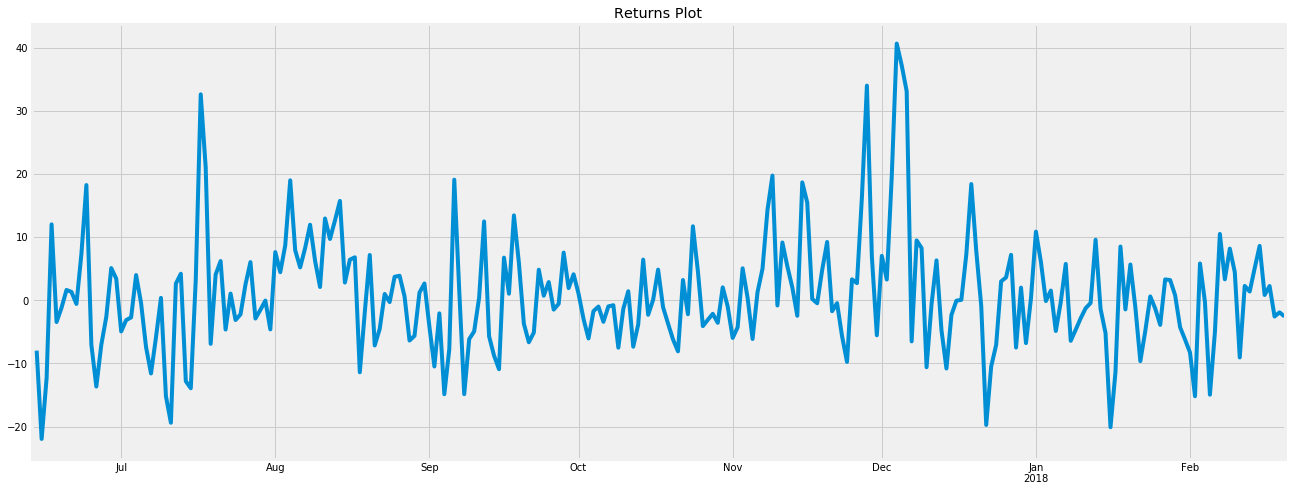

C:\Users\mehul\Time_Series_Analysis\predictions.py:59: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolmean = self.data.Mean.rolling(30).mean()
C:\Users\mehul\Time_Series_Analysis\predictions.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolstd = self.data.Mean.rolling(30).std()


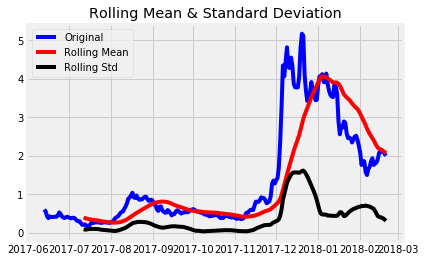

Results of Dickey-Fuller Test
Test Statistic                  -1.520617
p-value                          0.523289
#Lags Used                      11.000000
Number of Observations Used    241.000000
Critical Value(1%)              -3.457779
Critical Value(5%)              -2.873609
Critical Value(10%)             -2.573202
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            0.93696
p-value                   0.01000
Lags Used                16.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.429
P-value                         0.568
Lags                               16
-------------------------------------

Tren

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [3]:
df_iota.description()
df_iota.missing()
df_iota.plot_daily()
df_iota.plot_monthly()
df_iota.Percent_change()
df_iota.Returns()
df_iota.stationarity_test()

In [4]:
from Model import *

In [5]:
iota_ret = model(df_iota.data)

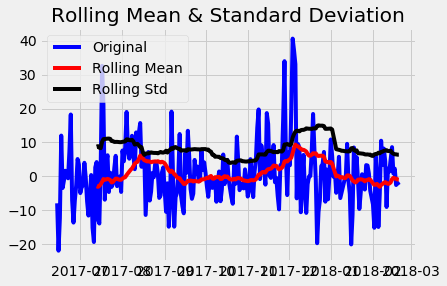

Results of Dickey-Fuller Test
Test Statistic                  -4.763283
p-value                          0.000064
#Lags Used                       5.000000
Number of Observations Used    246.000000
Critical Value(1%)              -3.457215
Critical Value(5%)              -2.873362
Critical Value(10%)             -2.573070
dtype: float64
Results of KPSS Test:
------------------------------------------------------------------------------
Test Statistic            0.102354
p-value                   0.100000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                -10.215
P-value                         0.000
Lags                               16
------------------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [6]:
iota_ret.stationarity_test()

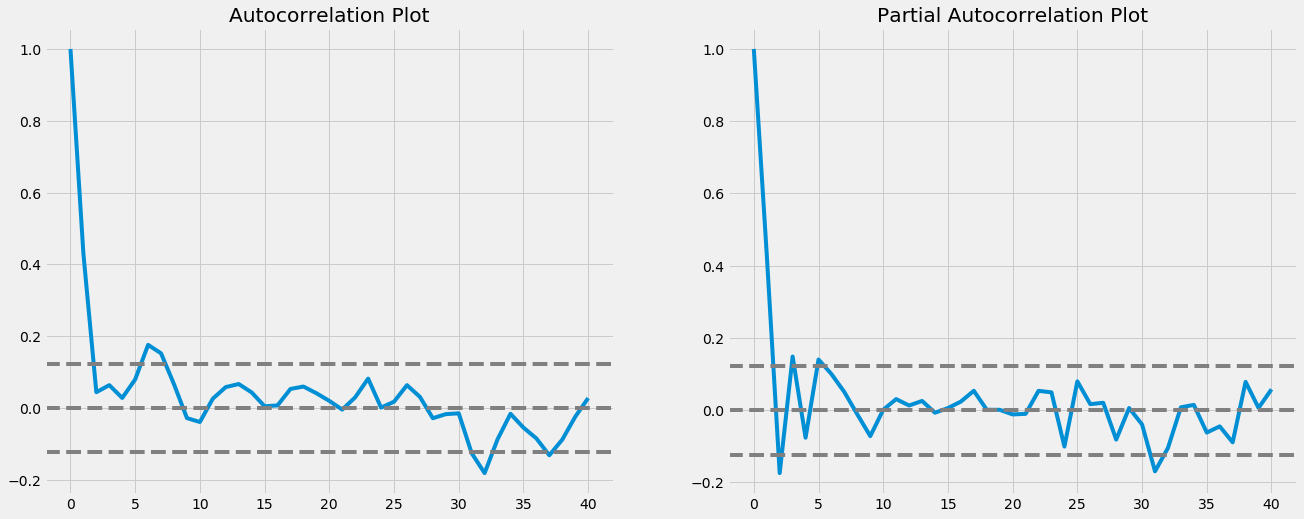

In [7]:
iota_ret.lags()

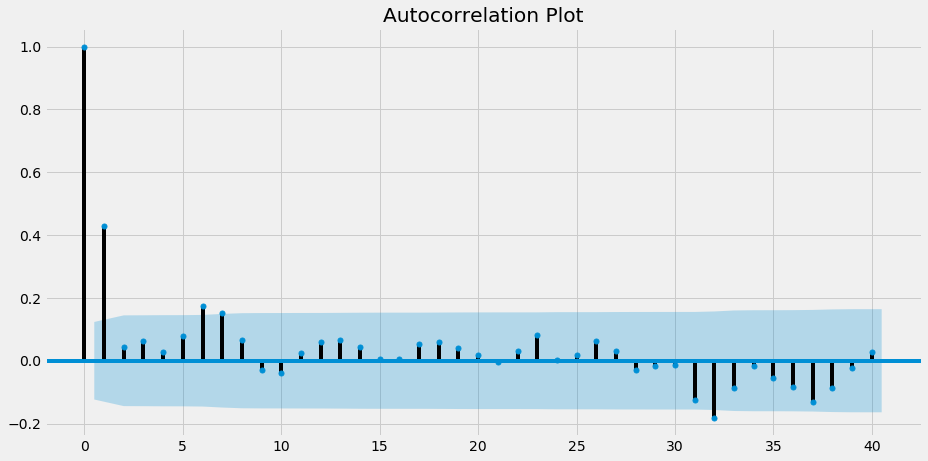

In [8]:
iota_ret.auto_graphics()

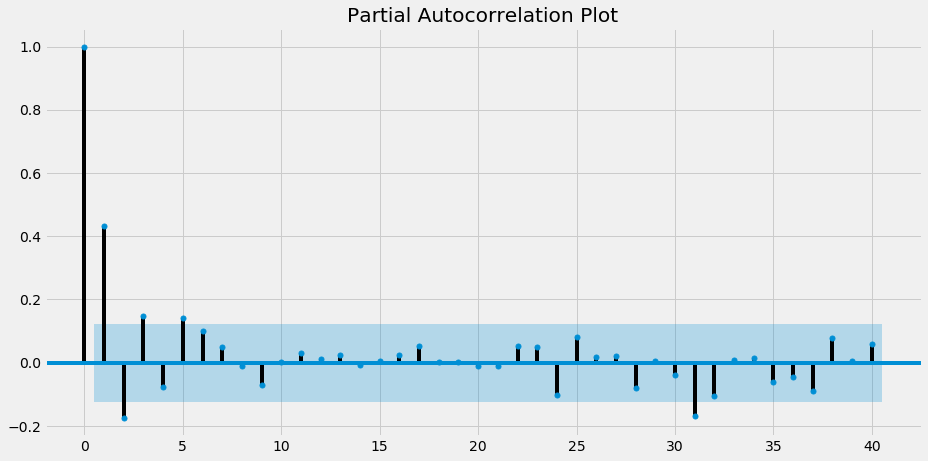

In [9]:
iota_ret.partial_graphics()

In [10]:
iota_ret.ARIMA_model(1,1)

                           Results: ARMA
Model:              ARMA             BIC:                 1780.8119 
Dependent Variable: Returns          Log-Likelihood:      -879.35   
Date:               2019-10-27 17:24 Scale:               1.0000    
No. Observations:   252              Method:              css-mle   
Df Model:           3                Sample:              06-14-2017
Df Residuals:       249                                   02-20-2018
Converged:          1.0000           S.D. of innovations: 7.923     
No. Iterations:     12.0000          HQIC:                1772.375  
AIC:                1766.6941                                       
---------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
---------------------------------------------------------------------
const              0.8514    0.7668   1.1103  0.2679  -0.6515  2.3542
ar.L1.Returns     -0.0167    0.1156  -0.1444  0.8853  -0.2

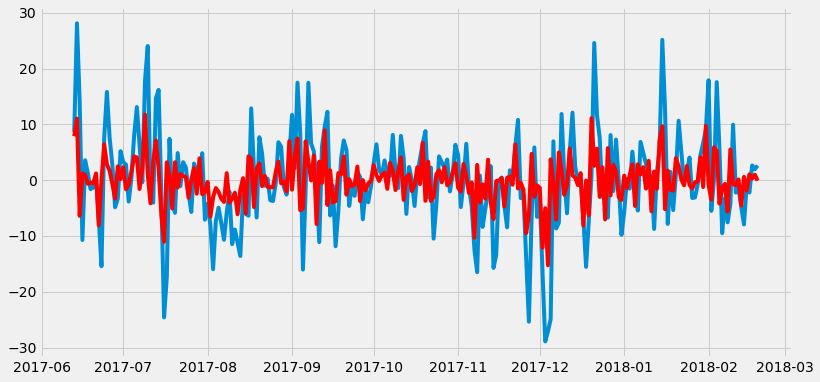

In [11]:
iota_ret.plot_predict()

In [4]:
df_iota.data = df_iota.data['2017-01-01':]

In [13]:
from produce_predict import *
#This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” 
#to find the optimal set of parameters that yields the best performance for our model.
iota_sarima = produce_predict(df_iota.data)

In [14]:
iota_sarima.order()

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:1042.8039493971041
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:829.7167278198957
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:784.3648416424104
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:696.821684542949
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:772.4187636777712
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:770.1246659984355
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:707.2048466333563
ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:700.9326852355963
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:711.0093649811578
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:547.6224715243138
ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:508.01630522080444
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:451.86639931495296
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:495.0069901645536
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:494.2479240364185
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:466.93680782206536
ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:458.66274783619616
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:-151.89635791337614
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:-104.70731380912648
ARIMA(0, 1, 0)x(0, 1, 0, 30) - AIC:44.

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 30) - AIC:-103.85066332999995
ARIMA(1, 0, 0)x(0, 1, 0, 30) - AIC:44.22915716993485
ARIMA(1, 0, 0)x(0, 1, 1, 30) - AIC:-41.307842258763415
ARIMA(1, 0, 0)x(1, 0, 0, 30) - AIC:-104.28968893301848
ARIMA(1, 0, 0)x(1, 0, 1, 30) - AIC:-102.29049903637737
ARIMA(1, 0, 0)x(1, 1, 0, 30) - AIC:8.593841236600369
ARIMA(1, 0, 0)x(1, 1, 1, 30) - AIC:-30.891668976118794
ARIMA(1, 0, 1)x(0, 0, 0, 30) - AIC:-191.22322017283454


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 30) - AIC:-138.20401112223104
ARIMA(1, 0, 1)x(0, 1, 0, 30) - AIC:6.083487668893966
ARIMA(1, 0, 1)x(0, 1, 1, 30) - AIC:-73.32778707477533
ARIMA(1, 0, 1)x(1, 0, 0, 30) - AIC:-140.31536581844952
ARIMA(1, 0, 1)x(1, 0, 1, 30) - AIC:-136.65914015983145
ARIMA(1, 0, 1)x(1, 1, 0, 30) - AIC:-29.17050301452882
ARIMA(1, 0, 1)x(1, 1, 1, 30) - AIC:-63.78539951423119
ARIMA(1, 1, 0)x(0, 0, 0, 30) - AIC:-189.32900478395536
ARIMA(1, 1, 0)x(0, 0, 1, 30) - AIC:-137.3681217506966
ARIMA(1, 1, 0)x(0, 1, 0, 30) - AIC:9.918357702021922
ARIMA(1, 1, 0)x(0, 1, 1, 30) - AIC:-72.4452706022802
ARIMA(1, 1, 0)x(1, 0, 0, 30) - AIC:-137.37169250584185
ARIMA(1, 1, 0)x(1, 0, 1, 30) - AIC:-135.37169961988405
ARIMA(1, 1, 0)x(1, 1, 0, 30) - AIC:-29.34789306139185
ARIMA(1, 1, 0)x(1, 1, 1, 30) - AIC:-63.793670261230076
ARIMA(1, 1, 1)x(0, 0, 0, 30) - AIC:-189.95622446474204
ARIMA(1, 1, 1)x(0, 0, 1, 30) - AIC:-137.1430332729546
ARIMA(1, 1, 1)x(0, 1, 0, 30) - AIC:9.47469783899676
ARIMA(1, 1, 1)x(0, 1, 1, 

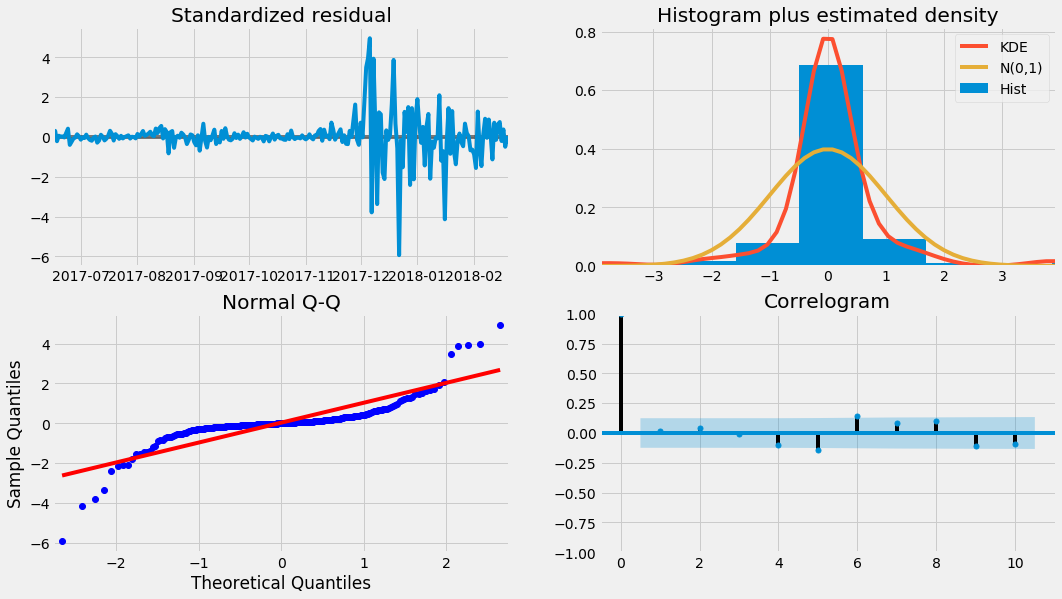

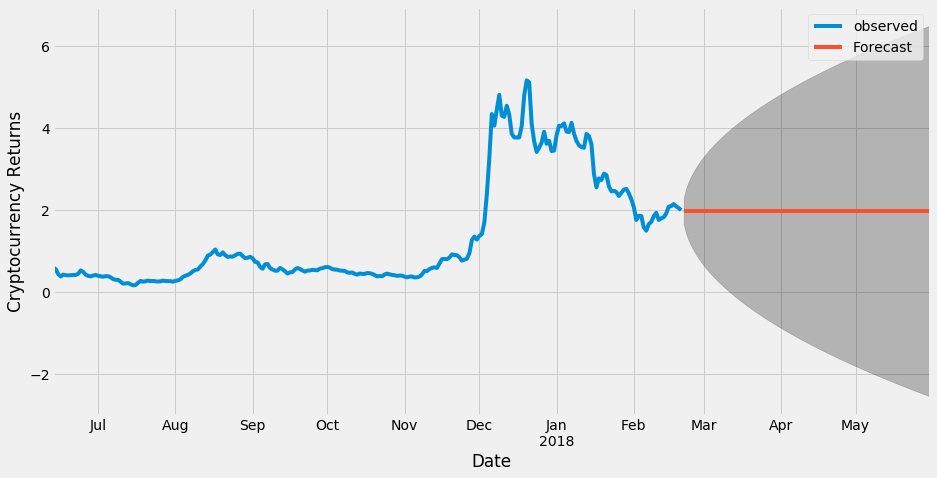

In [20]:
iota_sarima.sarima_model((0,1,1),(0,0,0,30))
iota_sarima.diagnostics()
iota_sarima.produce_forecast()

In [23]:
from fbprophet import Prophet
from prophet_model import *
iota_pro = prophet_model("iota_price.csv",0)

<Figure size 1296x432 with 0 Axes>

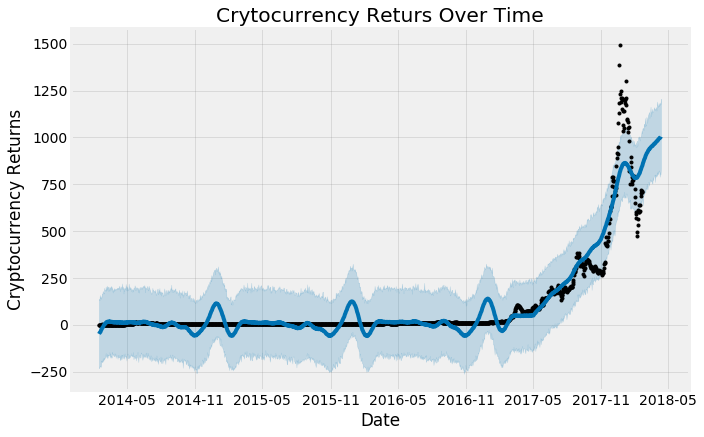

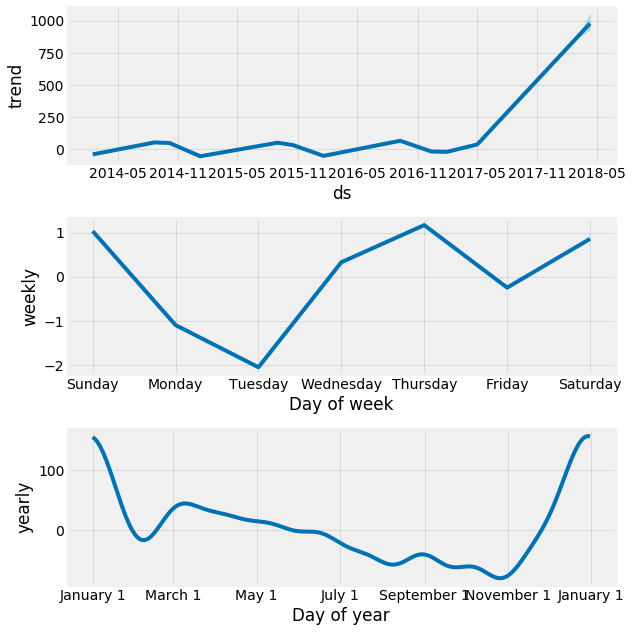

In [24]:
dash_pro.model()
dash_pro.forecast()
dash_pro.Vizualization()

In [5]:
from VaR import *
var = Var(df_iota.data)

C:\Users\mehul\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mehul\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


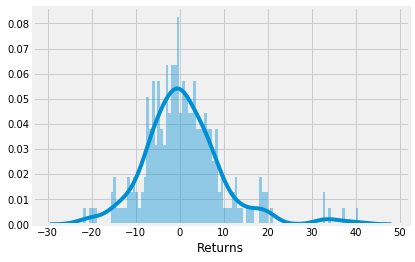

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -10.7212
95%                           -14.0054
99%                           -20.166


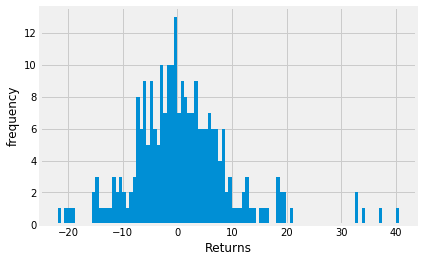

Confidence Interval      Value At Risk
---------------------  ---------------
90%                            -8.2665
95%                           -11.8999
99%                           -19.5474


In [6]:
var.var_cov(100)
var.hist_sim(100)

In [7]:
var.monte_carlo()

Simulated VAR is  51.672395574735496
